In [1]:
# Import necessary libraries

import numpy as np  # Import numpy for numerical computations
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting

import math
import copy

from sklearn.linear_model import LinearRegression # Import Logistic Regression model
from sklearn.model_selection import train_test_split # Import function for splitting data into train and test sets
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset from the specified file path
ds = pd.read_csv('/kaggle/input/sales-revenue-prediction/Sales_Revenue.csv')

# Display the loaded dataset
ds

,Year,Month,Sales Revenue ($),Marketing Spend ($),Units Sold,New Customers,Economic Indicator (Index)
0,2014,Jan,100000,15000,5000,200,95
1,2014,Feb,110000,16000,5500,210,96
2,2014,Mar,120000,17000,6000,220,97
3,2014,Apr,115000,16500,5800,215,96
4,2014,May,130000,18000,6500,230,98
...,...,...,...,...,...,...,...
71,2022,Sep,200000,25000,8500,305,108
72,2022,Oct,210000,26500,9200,320,110
73,2022,Nov,215000,27000,9500,330,111
74,2022,Dec,225000,27500,9700,345,113


In [3]:
#get all categorical columns
cat_columns = ds.select_dtypes(['object']).columns

#convert all categorical columns to numeric
ds[cat_columns] = ds[cat_columns].apply(lambda x: pd.factorize(x)[0])

# Display the dataset
ds

,Year,Month,Sales Revenue ($),Marketing Spend ($),Units Sold,New Customers,Economic Indicator (Index)
0,2014,0,100000,15000,5000,200,95
1,2014,1,110000,16000,5500,210,96
2,2014,2,120000,17000,6000,220,97
3,2014,3,115000,16500,5800,215,96
4,2014,4,130000,18000,6500,230,98
...,...,...,...,...,...,...,...
71,2022,8,200000,25000,8500,305,108
72,2022,9,210000,26500,9200,320,110
73,2022,10,215000,27000,9500,330,111
74,2022,11,225000,27500,9700,345,113


In [4]:
# Check dataset’s structure and information
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Year                        76 non-null     int64
 1   Month                       76 non-null     int64
 2   Sales Revenue ($)           76 non-null     int64
 3   Marketing Spend ($)         76 non-null     int64
 4   Units Sold                  76 non-null     int64
 5   New Customers               76 non-null     int64
 6   Economic Indicator (Index)  76 non-null     int64
dtypes: int64(7)
memory usage: 4.3 KB


In [5]:
# returns the number of missing values in the dataset
ds.isnull().sum()

Year                          0
Month                         0
Sales Revenue ($)             0
Marketing Spend ($)           0
Units Sold                    0
New Customers                 0
Economic Indicator (Index)    0
dtype: int64

In [6]:
# Visualise the data
ds.head()

,Year,Month,Sales Revenue ($),Marketing Spend ($),Units Sold,New Customers,Economic Indicator (Index)
0,2014,0,100000,15000,5000,200,95
1,2014,1,110000,16000,5500,210,96
2,2014,2,120000,17000,6000,220,97
3,2014,3,115000,16500,5800,215,96
4,2014,4,130000,18000,6500,230,98


In [7]:
ds.tail()

,Year,Month,Sales Revenue ($),Marketing Spend ($),Units Sold,New Customers,Economic Indicator (Index)
71,2022,8,200000,25000,8500,305,108
72,2022,9,210000,26500,9200,320,110
73,2022,10,215000,27000,9500,330,111
74,2022,11,225000,27500,9700,345,113
75,2023,0,150000,20000,5900,255,104


In [8]:
# view statistics of dataset
ds.describe()

,Year,Month,Sales Revenue ($),Marketing Spend ($),Units Sold,New Customers,Economic Indicator (Index)
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2017.868421,5.223684,161842.105263,21098.684211,7377.631579,268.684211,102.986842
std,2.931858,3.583662,30603.290730,3144.327948,1347.154897,34.042801,4.180888
min,2014.000000,0.000000,100000.000000,15000.000000,5000.000000,200.000000,95.000000
25%,2015.000000,2.000000,140000.000000,18500.000000,6175.000000,243.750000,100.000000
50%,2017.500000,5.000000,160000.000000,21000.000000,7450.000000,265.000000,103.000000
75%,2021.000000,8.000000,185000.000000,23500.000000,8525.000000,295.000000,106.000000
max,2023.000000,11.000000,225000.000000,27500.000000,9700.000000,345.000000,113.000000


In [9]:
# view columns
ds.columns

Index(['Year', 'Month', 'Sales Revenue ($)', 'Marketing Spend ($)',
       'Units Sold', 'New Customers', 'Economic Indicator (Index)'],
      dtype='object')

In [10]:
# Spliting dataset into input and output (i.e x and y)
y = ds.iloc[:, 2]  # 3rd column
x = ds.drop(columns=ds.columns[2])

In [11]:
# visualise x and y
y

0     100000
1     110000
2     120000
3     115000
4     130000
       ...  
71    200000
72    210000
73    215000
74    225000
75    150000
Name: Sales Revenue ($), Length: 76, dtype: int64

In [12]:
x

,Year,Month,Marketing Spend ($),Units Sold,New Customers,Economic Indicator (Index)
0,2014,0,15000,5000,200,95
1,2014,1,16000,5500,210,96
2,2014,2,17000,6000,220,97
3,2014,3,16500,5800,215,96
4,2014,4,18000,6500,230,98
...,...,...,...,...,...,...
71,2022,8,25000,8500,305,108
72,2022,9,26500,9200,320,110
73,2022,10,27000,9500,330,111
74,2022,11,27500,9700,345,113


In [13]:
# scaling input data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_train = scaler.transform(x)

In [14]:
# convert pandas to numpy ndarray
y_train = y.to_numpy()

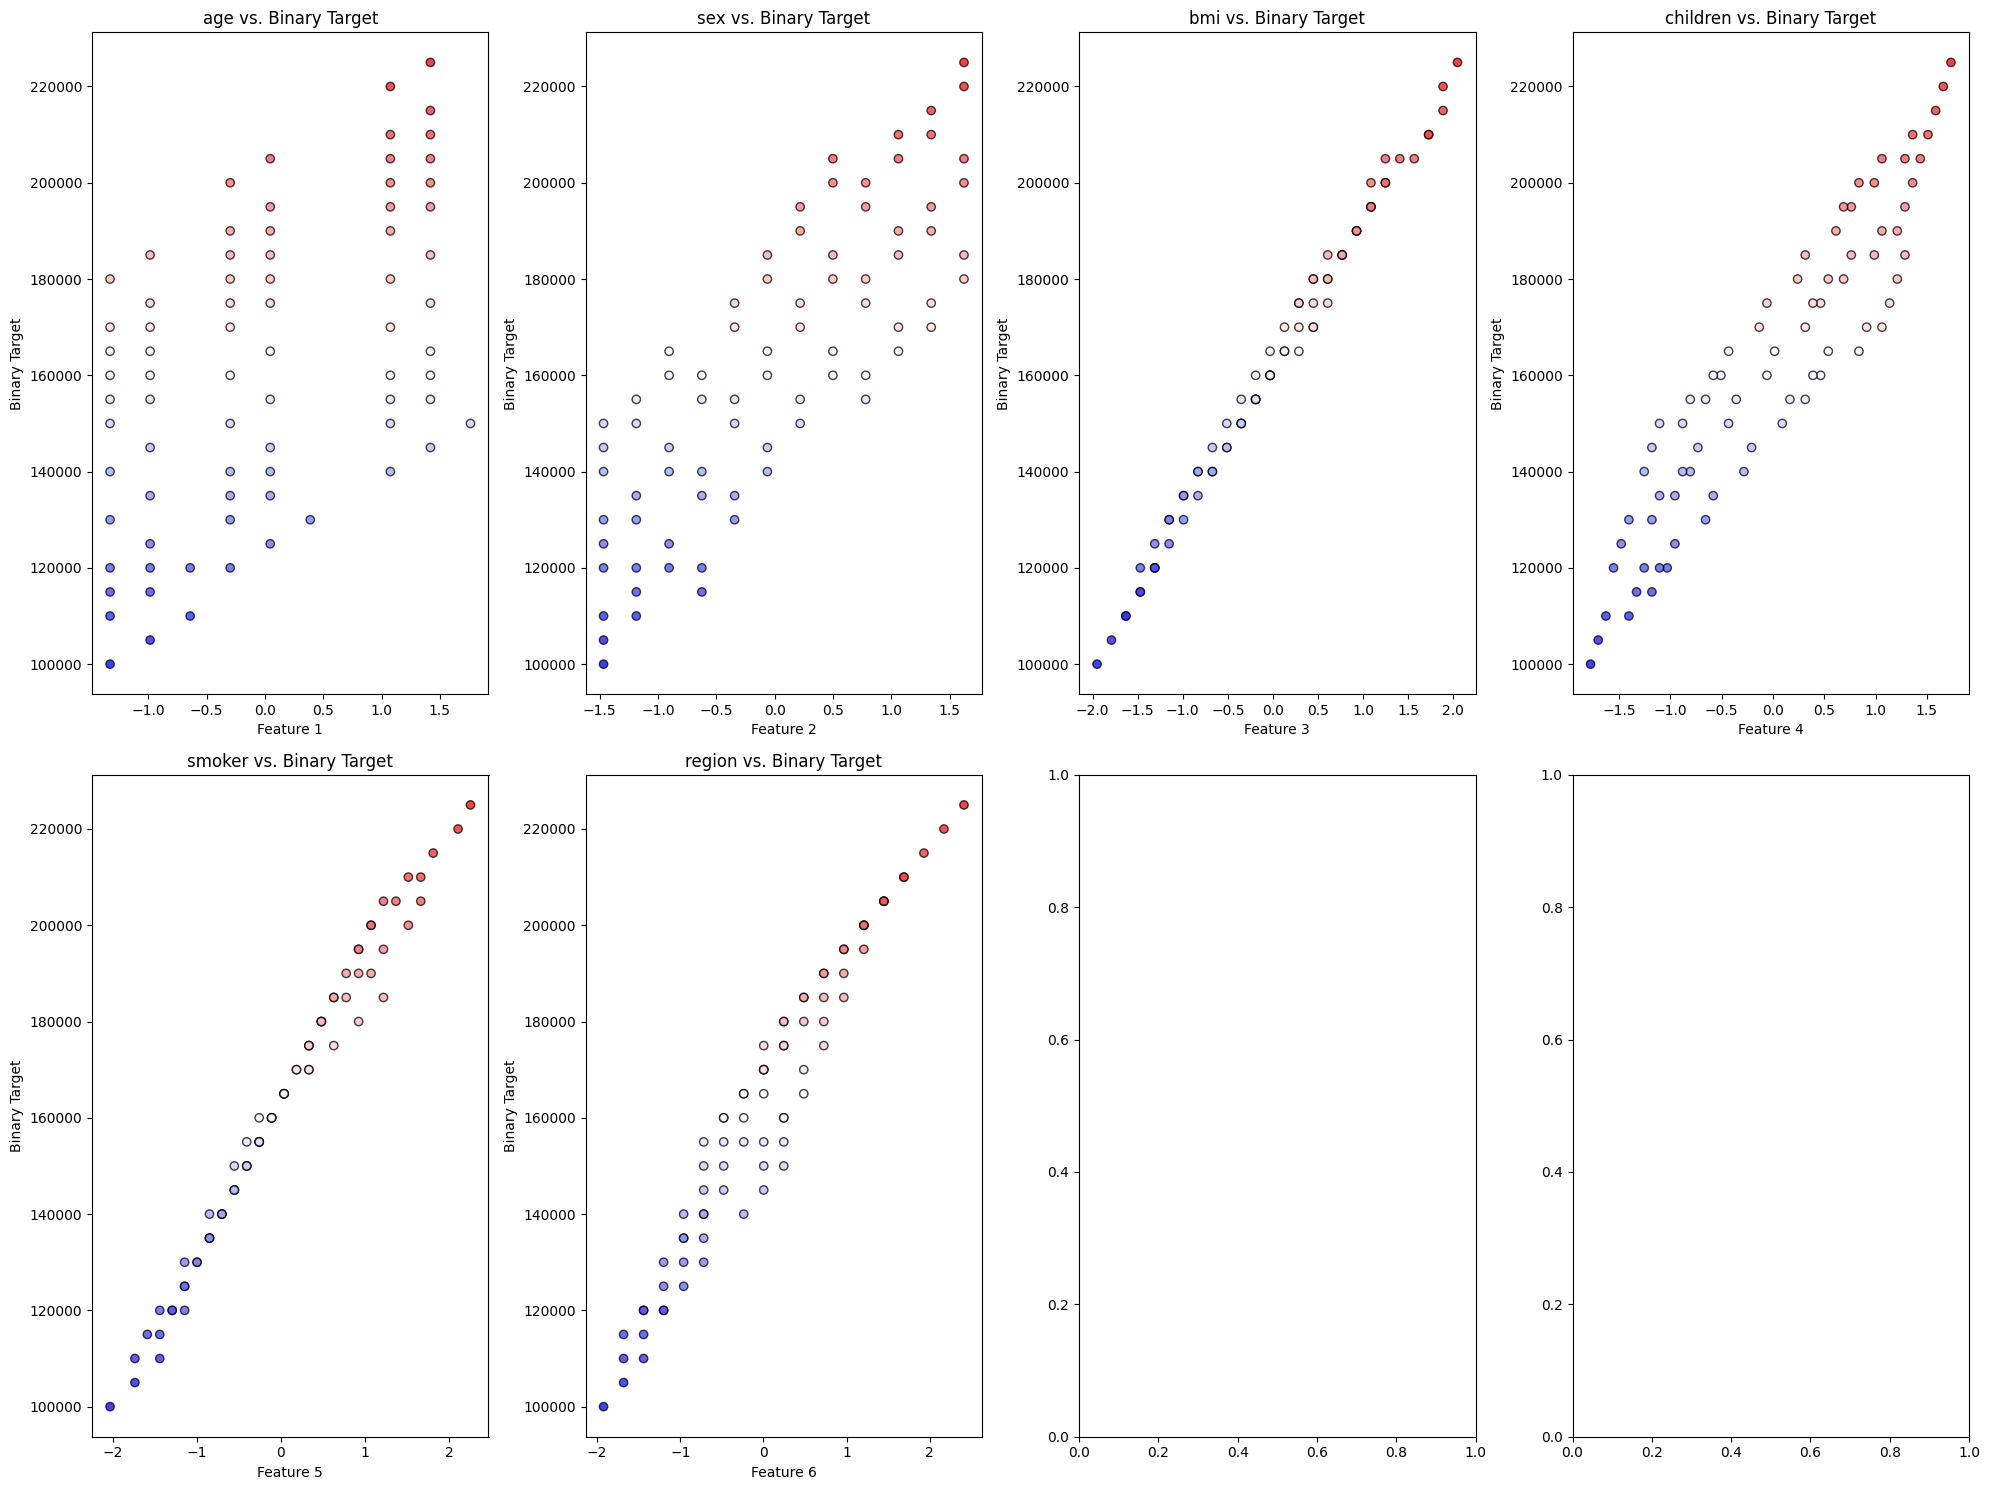

In [16]:
# Data visulation
# plotting each features against the output variable y
y_train = y_train.reshape(-1)

# list of feature names
features = ["age", "sex", "bmi", "children", "smoker", "region", "charges"]

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 15))

# Plot each feature against the binary target
for k in range(6):  # We only have 8 subplots, adjust as necessary
    i = k // 4  # Row index
    j = k % 4   # Column index
    axes[i, j].scatter(x_train[:, k], y_train, c=y_train, cmap='bwr', alpha=0.75, edgecolor='k')
    axes[i, j].set_title(f'{features[k]} vs. Binary Target')
    axes[i, j].set_xlabel(f'Feature {k+1}')
    axes[i, j].set_ylabel('Binary Target')
# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 2)

In [18]:
# view the training variable
print("Elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

print("\n Elements in y_train are:\n", Y_train[:5])
print("Type of y_train:",type(Y_train))

Elements in X_train are:
 [[-0.98486381  0.21806581 -0.19166646  0.16616201 -0.25679184 -0.47837776]
 [ 1.07521829 -0.62462917 -0.19166646 -0.65579918 -0.25679184  0.00316806]
 [-1.32821083  1.62255744  0.60869899  1.21229444  0.92600695  0.48471389]
 [-1.32821083 -1.46732416 -1.95247047 -1.77665536 -2.03099004 -1.92301525]
 [ 1.07521829 -0.34373085  0.28855281 -0.13273297  0.1867577   0.48471389]]
Type of X_train: <class 'numpy.ndarray'>

 Elements in y_train are:
 [155000 155000 180000 100000 170000]
Type of y_train: <class 'numpy.ndarray'>


In [19]:
# Check the dimensions of training variables
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(Y_train.shape))
print ('We have m = %d training examples' % (len(Y_train)))

The shape of X_train is: (57, 6)
The shape of y_train is: (57,)
We have m = 57 training examples


In [20]:
# view the testing variables
print("Elements in x_test are:\n", X_test)
print("Type of X_test:",type(X_test))

print("Elements in y_test are:\n", Y_test)
print("Type of Y_test:",type(Y_test))

Elements in x_test are:
 [[ 1.41856531  0.49896413  1.40906445  1.06284695  1.22170665  1.44780555]
 [ 1.07521829  1.62255744  1.88928373  1.66063691  2.10880575  2.17012429]
 [ 1.76191233 -1.46732416 -0.35173956 -1.10414165 -0.40464169  0.24394098]
 [-1.32821083 -1.18642583 -1.63232429 -1.40303664 -1.73529034 -1.68224234]
 [-0.29816978 -0.34373085 -0.51181265 -0.43162795 -0.40464169 -0.47837776]
 [ 1.41856531 -1.18642583 -0.19166646 -0.80524667 -0.25679184  0.24394098]
 [ 1.41856531 -0.06283252  0.76877208  0.3156095   0.63030725  0.96625972]
 [ 1.41856531  0.21806581  1.08891827  0.68922823  0.92600695  1.20703264]
 [-0.98486381 -1.18642583 -1.4722512  -1.32831289 -1.43959064 -1.44146942]
 [-0.29816978 -0.9055275  -0.83195883 -0.80524667 -0.70034139 -0.71915068]
 [ 0.04517724  1.34165911  1.08891827  1.28701819  1.22170665  0.96625972]
 [ 0.04517724  0.49896413  0.60869899  0.76395197  0.63030725  0.48471389]
 [-0.29816978 -0.62462917 -0.99203192 -0.95469416 -0.84819124 -0.95992359]


In [21]:
# Check the dimensions of testing variables
print ('The shape of X_test is: ' + str(X_test.shape))
print ('The shape of y_test is: ' + str(Y_test.shape))
print ('We have m = %d testing examples' % (len(Y_test)))

The shape of X_test is: (19, 6)
The shape of y_test is: (19,)
We have m = 19 testing examples


# **Model Training**

In [22]:
# Cost function for linear regression
def compute_cost(x, y, w, b): 
    
    # number of training examples
    m = x.shape[0] 

    total_cost = 0

    ### START CODE HERE ###
    cost=0
    for i in range(m):
        f_wb = w*x[i]+b
        cost += (f_wb - y[i])**2
    
    total_cost = cost/(2*m)
    
    ### END CODE HERE ### 

    return total_cost

In [23]:
# Gradient for linear regression
def compute_gradient(x, y, w, b): 

    # Number of training examples
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ### 
    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        dj_db += f_wb - y[i]
        dj_dw += (f_wb - y[i])*x[i]
    dj_dw /= m
    dj_db /= m
    
    ### END CODE HERE ### 
    
    return dj_dw, dj_db

In [32]:
# Learning parameters using batch gradient descent
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):     
    # number of training examples
    m = len(x)
    #print("in gradient_descent")
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
#     b = 0
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  
        
        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
        
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1][0]):8.2f}   ")
#     print(b,dj_db)
#     print("J_history = ", J_history)
    return w, b, J_history, w_history #return w and J,w history for graphing

In [33]:
initial_w = np.zeros(x_train.shape[1])
initial_b = 0.

# some gradient descent settings
iterations = 9000
alpha = 0.001

w,b,j_,b_ = gradient_descent(x_train ,y_train , initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)
# print("j_ = ",j_)

Iteration    0: Cost 13532119609.92   
Iteration  900: Cost 2568119360.05   
Iteration 1800: Cost 762458247.10   
Iteration 2700: Cost 463685055.18   
Iteration 3600: Cost 414040849.92   
Iteration 4500: Cost 405658024.64   
Iteration 5400: Cost 404131481.11   
Iteration 6300: Cost 403752694.19   
Iteration 7200: Cost 403569718.89   
Iteration 8100: Cost 403422150.88   
w,b found by gradient descent: [4268.62980917 4262.07328843 6758.37741117 6384.89843269 6182.86346068
 5805.60037629] 161822.22209648765


In [44]:
# Evaluating linear regression
m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = np.dot(w, X_train[i]) + b

In [46]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [47]:
mse = mean_squared_error(Y_train, predicted)
rmse = root_mean_squared_error(Y_train, predicted)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 5578881.92
Root Mean Squared Error (RMSE): 2361.97


In [48]:
m = X_test.shape[0]
predicted =  np.zeros(m)

for i in range(m):
    predicted[i] = np.dot(w, X_test[i]) + b

In [50]:
mse = mean_squared_error(Y_test, predicted)
rmse = root_mean_squared_error(Y_test, predicted)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 6659376.44
Root Mean Squared Error (RMSE): 2580.58


In [ ]:
# # Plot the linear fit
# plt.plot(x_train[:,0], predicted, c = "b")

# # Create a scatter plot of the data. 
# plt.scatter(x_train[:, 0], y_train, marker='x', c='r') 

# # Set the title
# plt.title("Year vs Sales Revenue ($)")
# # Set the y-axis label
# plt.ylabel("Sales Revenue ($)")
# # Set the x-axis label
# plt.xlabel("Year")

In [40]:
model = LinearRegression()

# X_train_new = X_train_new.reshape(-1, 1)
model.fit(X_train, Y_train)

m = X_train.shape[0]
predicted = np.zeros(m)

# predicted = model.predict(X_test)

print(model.coef_)
print(model.intercept_)

[ 13763.87127851  -1238.74668488 -14033.7615357   33334.77061231
   9385.25267908  -2339.93069952]
161911.03373201116


In [41]:
predicted = model.predict(X_train)

# Calculate metrics
mse = mean_squared_error(Y_train, predicted)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root mean Squared Error: {rmse}")

Mean Squared Error: 3670350.5973194065
Root mean Squared Error: 1915.8159090370366


In [42]:
predicted = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(Y_test, predicted)
rmse = np.sqrt(mse)
# r2 = r2_score(Y_test, predicted)

print(f"Mean Squared Error: {mse}")
print(f"Root mean Squared Error: {rmse}")
# print(f"R^2 Score: {r2}")

Mean Squared Error: 2954093.8893854734
Root mean Squared Error: 1718.7477678197793
